# Семинар 2

In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/home/nestyme/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [42]:
pd.__version__

'0.22.0'

In [43]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [44]:
y.to_csv('data.csv')

In [45]:
y = y['co2'].resample('MS').mean()

y = y.fillna(y.bfill())


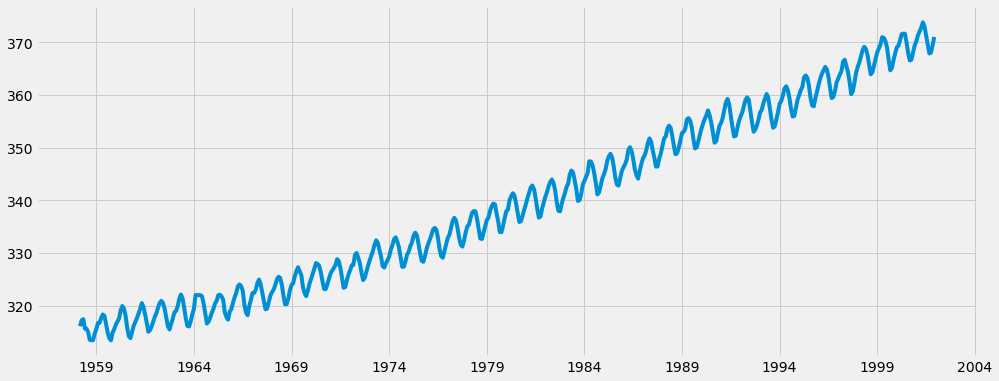

In [46]:
y.plot(figsize=(15, 6))
plt.show()

In [47]:
k,b=np.polyfit([i for i in range(len(y))],y,deg=1)
k = round(k,3)
b = round(b,3)
print('Тренд: y={}x+{}'.format(k,b))

Тренд: y=0.111x+310.456


In [74]:
y_without_trend=y-b

In [75]:
y_without_trend=pd.core.series.Series(y_without_trend[i + 1] - 
                               y_without_trend[i] for i in range(len(y_without_trend) - 1))

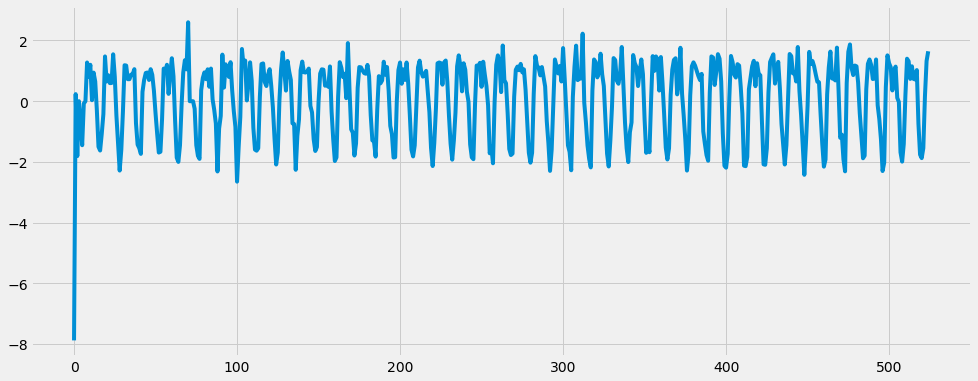

In [76]:
(y_without_trend).plot(figsize=(15, 6))
plt.show()

In [80]:
import statsmodels
statsmodels.tsa.stattools.kpss(y_without_trend)

(0.20277887188031024,
 0.1,
 19,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [96]:
import statsmodels.api as sm
def Draw_autcorrelation(y_without_trend,c):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(y, lags=100, ax=ax1,color=c)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(y, lags=100, ax=ax2,color=c)
    plt.show()

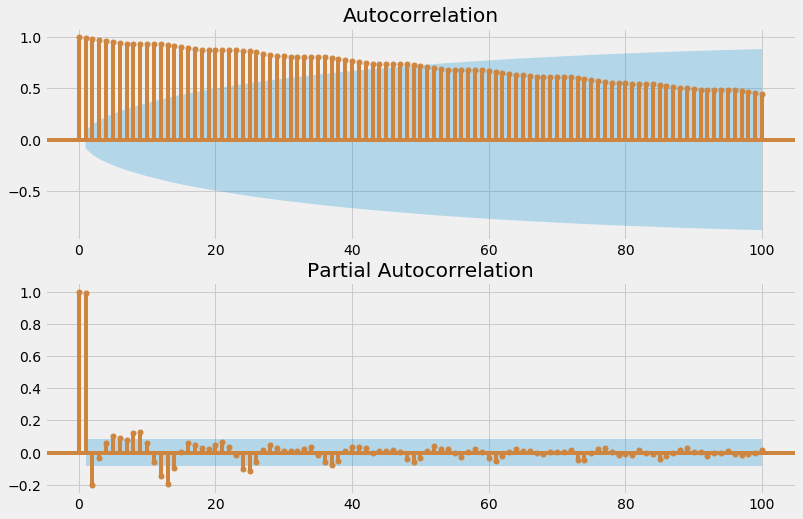

In [97]:
Draw_autcorrelation(y,'peru')

### Часть 1
Загрузка и предобработка данных
1. Загрузите данные из датасета `сo2` с помощью функции `load_pandas()` из библиотеки `statsmodels`
2. Сгруппируйте данные по месяцам
3. Заполните пропуски по вашему усмотрению. Объясните, почему вы сделали именно так
4. Постройте график для данных. Посмотрите, как они распределены. Какой тренд и период можно выделить?
5. Выделите тренд, уберите его

### Часть 2
работа с `ARIMA` и подбор параметров.

1. Выберите начальные диапазоны для значений `p, q, d`. Сгенерируйте комбинации для перебора `(p,q,d)` и их сезонных вариантов
2. Используя AIC, выберите оптимальные параметры

### Часть 3

1. Задайте модель с подобранными параметрами и используйте .fit()
2. Выведите описание модели при помощи `.summary`

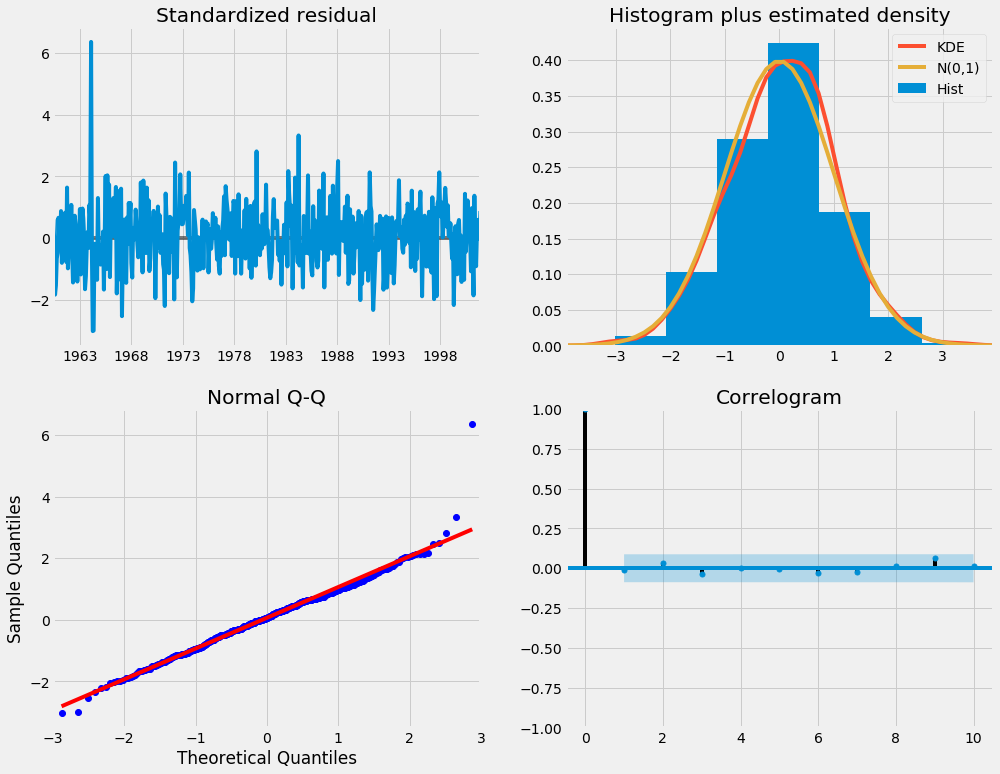

In [28]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Часть 4
Валидация и визуализация результатов
1. При помощи `.get_prediction()` постройте предсказания для датасета на 3 года
2. Постройте график для предсказаний
3. Посчитайте `MSE` и `MAE`